In [ ]:
import cv2
import numpy as np

def find_maximum_intersection_area(image):
  _, threshold = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

  contours, _ = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


  print(f'No of countours: {len(contours)}')

  # Initialize the maximum intersection area to 0.
  max_intersection_area = 0
  max_intersection_mask = None

  i=0
  # Iterate over the contours and find the maximum intersection area.
  for contour in contours:

    if i == 0:
      i = 1
      continue

    # Create a mask for the contour.
    mask = np.zeros_like(image, dtype=np.uint8)
    cv2.drawContours(mask, [contour], -1, (255, 255, 255), -1)

    # Find the intersection of the mask and the image.
    intersection_mask = mask & image

    # Calculate the intersection area.
    intersection_area = np.sum(intersection_mask)

    # If the intersection area is greater than the maximum intersection area, update the maximum intersection area.
    if intersection_area > max_intersection_area:
      max_intersection_area = intersection_area
      max_intersection_mask = intersection_mask

  # Highlight the maximum intersection area in black.
  image[max_intersection_mask > 0] = 0

  return image


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
image = cv2.imread("Input-1.jpg")
plt.imshow(image)

In [ ]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray)

In [ ]:
# image = find_maximum_intersection_area(image_gray)
# image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# plt.imshow(image)

In [ ]:
_, threshold = cv2.threshold(image_gray, 127, 255, cv2.THRESH_TRIANGLE)

plt.imshow(threshold)

In [ ]:
# using a findContours() function
contours, _ = cv2.findContours(
	threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
print(f'no of countours is: {len(contours)}')

In [ ]:
new_image= image.copy()

In [ ]:
max_intersection_area = 0
max_intersection_mask = None
i=0
# Iterate over the contours and find the maximum intersection area.
for contour in contours:
  if i == 0:
    i = 1
    continue
  # Create a mask for the contour.
  mask = np.zeros_like(image, dtype=np.uint8)
  cv2.drawContours(mask, [contour], -1, (255, 255, 255), -1)
  # Find the intersection of the mask and the image.
  intersection_mask = mask & image
  # Calculate the intersection area.
  intersection_area = np.sum(intersection_mask)
  # If the intersection area is greater than the maximum intersection area, update the maximum intersection area.
  if intersection_area > max_intersection_area:
    max_intersection_area = intersection_area
    max_intersection_mask = intersection_mask
# Highlight the maximum intersection area in black.
image[max_intersection_mask > 0] = 0

In [ ]:
plt.imshow(image)

In [ ]:
# reading image
img = cv2.imread('Input-1.jpg')

# converting image into grayscale image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# setting threshold of gray image
_, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_TRIANGLE)

# using a findContours() function
# contours, _ = cv2.findContours(
	# threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours, _ = cv2.findContours(
	threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

i = 0
shape= img.shape
img_copy= np.zeros(shape=shape)

# list for storing names of shapes
for contour in contours:

	# here we are ignoring first counter because
	# findcontour function detects whole image as shape
	if i == 0:
		i = 1
		continue

	# cv2.approxPloyDP() function to approximate the shape
	approx = cv2.approxPolyDP(
		contour, 0.01 * cv2.arcLength(contour, True), True)
	
	
	
	# using drawContours() function
	cv2.drawContours(img, [contour], 0, (0, 0, 255), 5)
	cv2.drawContours(img_copy, [contour], 0, (0, 0, 255), 5)


	

	


In [ ]:
plt.imshow(img)

In [ ]:
img.shape

In [ ]:
plt.imshow(img)

In [ ]:
plt.imshow(img_copy)

In [ ]:
foog = cv2.createBackgroundSubtractorMOG2(
    detectShadows=False, varThreshold= 100, history=100)

In [ ]:
frame= cv2.imread('Input-1.jpg')
plt.imshow(frame)

In [ ]:
fgmask = foog.apply(frame)

# ret, fgmask = cv2.threshold(fgmask, 250, 255, cv2.THRESH_BINARY)

In [ ]:
plt.imshow(fgmask)

# **GFG**

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# reading image
img = cv2.imread('shapes.png')

# converting image into grayscale image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# setting threshold of gray image
_, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# using a findContours() function
contours, _ = cv2.findContours(
	threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

i = 0

# list for storing names of shapes
for contour in contours:

	# here we are ignoring first counter because
	# findcontour function detects whole image as shape
	if i == 0:
		i = 1
		continue

	# cv2.approxPloyDP() function to approximate the shape
	approx = cv2.approxPolyDP(
		contour, 0.01 * cv2.arcLength(contour, True), True)
	
	# using drawContours() function
	cv2.drawContours(img, [contour], 0, (0, 0, 255), 5)

	# finding center point of shape
	M = cv2.moments(contour)
	if M['m00'] != 0.0:
		x = int(M['m10']/M['m00'])
		y = int(M['m01']/M['m00'])

	# putting shape name at center of each shape
	if len(approx) == 3:
		cv2.putText(img, 'Triangle', (x, y),
					cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 255), 2)

	elif len(approx) == 4:
		cv2.putText(img, 'Quadrilateral', (x, y),
					cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 255), 2)

	elif len(approx) == 5:
		cv2.putText(img, 'Pentagon', (x, y),
					cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 255), 2)

	elif len(approx) == 6:
		cv2.putText(img, 'Hexagon', (x, y),
					cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 255), 2)

	else:
		cv2.putText(img, 'circle', (x, y),
					cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 255), 2)

# displaying the image after drawing contours
plt.imshow(img)


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# reading image
img = cv2.imread('Input.jpg')

# converting image into grayscale image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,127,255,1)

contours,h = cv2.findContours(thresh,1,2)

for cnt in contours:
    approx = cv2.approxPolyDP(cnt,0.01*cv2.arcLength(cnt,True),True)
    print (len(approx))
    if len(approx)==5:
        print ("pentagon")
        cv2.drawContours(img,[cnt],0,255,-1)
    elif len(approx)==3:
        print ("triangle")
        cv2.drawContours(img,[cnt],0,(0,255,0),-1)
    elif len(approx)==4:
        print ("square")
        cv2.drawContours(img,[cnt],0,(0,0,255),-1)
    elif len(approx) == 9:
        mask = np.zeros_like(img, dtype=np.uint8)
        cv2.drawContours(mask, [cnt], -1, (255, 255, 255), -1)
        # Find the intersection of the mask and the image.
        intersection_mask = mask & img
        print ("half-circle")
        cv2.drawContours(img,[cnt],0,(255,255,0),-1)
        intersection_area = np.sum(intersection_mask)

    elif len(approx) > 15:
        print ("circle")
        cv2.drawContours(img,[cnt],0,(0,255,255),-1)

# displaying the image after drawing contours
plt.imshow(img)


In [ ]:
img[intersection_mask < 0] = 0

plt.imshow(intersection_mask)

In [ ]:
import numpy as np
import cv2 

In [ ]:
img = cv2.imread('Input.jpg')
imgGry = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

_, thrash = cv2.threshold(imgGry, 240 , 255, cv2.CHAIN_APPROX_NONE)
contours , _ = cv2.findContours(thrash, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

In [ ]:
print(f'No of countours: {len(contours)}')
# Initialize the maximum intersection area to 0.
max_intersection_area = 0
max_intersection_mask = None

i=0



 

In [ ]:

for contour in contours:

    if i <50:
        i+=1
        continue
    approx = cv2.approxPolyDP(contour, 0.01* cv2.arcLength(contour, True), True)
    cv2.drawContours(img, [approx], 0, (0, 0, 0), 5)
    x = approx.ravel()[0]
    y = approx.ravel()[1] - 5



    mask = np.zeros_like(img, dtype=np.uint8)
    cv2.drawContours(mask, [contour], -1, (255, 255, 255), -1)


    intersection_mask = mask & img

    # Calculate the intersection area.
    intersection_area = np.sum(intersection_mask)

    # If the intersection area is greater than the maximum intersection area, update the maximum intersection area.
    if intersection_area > max_intersection_area:
      max_intersection_area = intersection_area
      max_intersection_mask = intersection_mask


    if len(approx) == 3:
        pass
        # cv2.putText( img, "Triangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0) )
    elif len(approx) == 4 :
        # pass
        x, y , w, h = cv2.boundingRect(approx)
        # aspectRatio = float(w)/h
        # print(aspectRatio)
        # if aspectRatio >= 0.95 and aspectRatio < 1.05:
            # cv2.putText(img, "square", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))

        # else:
            # cv2.putText(img, "rectangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))

    elif len(approx) == 5 :
        pass
        # cv2.putText(img, "pentagon", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
    elif len(approx) == 10 :
        pass
        # cv2.putText(img, "star", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
    # else:
    #     cv2.putText(img, "circle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))

In [ ]:
plt.imshow(img)

In [ ]:
img[max_intersection_mask > 0] = 0

max_intersection_mask2= max_intersection_mask


In [ ]:
plt.imshow(img)

In [ ]:
rectangle_intersection= img.copy()
plt.imshow(rectangle_intersection)

In [1]:
import cv2
cv2.__version__

'4.7.0'

In [2]:


import numpy as np
import matplotlib.pyplot as plt

 

In [3]:
img = cv2.imread('Input.jpg')
imgGry = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# _, thrash = cv2.threshold(imgGry, 240 , 255, cv2.CHAIN_APPROX_NONE)
_, thrash = cv2.threshold(imgGry, 127 , 255, cv2.THRESH_BINARY)
contours , _ = cv2.findContours(thrash, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)


print(f'No of countours: {len(contours)}')
# Initialize the maximum intersection area to 0.
max_intersection_area = 0
max_intersection_mask = None

i=0



for contour in contours:

    if i <24:
        i+=1
        continue
    approx = cv2.approxPolyDP(contour, 0.01* cv2.arcLength(contour, True), True)
    cv2.drawContours(img, [approx], 0, (0, 0, 0), 5)
    x = approx.ravel()[0]
    y = approx.ravel()[1] - 5



    mask = np.zeros_like(img, dtype=np.uint8)
    cv2.drawContours(mask, [contour], -1, (255, 255, 255), -1)


    intersection_mask = mask & img

    # Calculate the intersection area.
    intersection_area = np.sum(intersection_mask)

    # If the intersection area is greater than the maximum intersection area, update the maximum intersection area.
    if intersection_area > max_intersection_area:
      max_intersection_area = intersection_area
      max_intersection_mask = intersection_mask


    if len(approx) == 3:
        pass
        # cv2.putText( img, "Triangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0) )
    elif len(approx) == 4 :
        # pass
        x, y , w, h = cv2.boundingRect(approx)
        # aspectRatio = float(w)/h
        # print(aspectRatio)
        # if aspectRatio >= 0.95 and aspectRatio < 1.05:
            # cv2.putText(img, "square", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))

        # else:
            # cv2.putText(img, "rectangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))

    elif len(approx) == 5 :
        pass
        # cv2.putText(img, "pentagon", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
    elif len(approx) == 10 :
        pass
        # cv2.putText(img, "star", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
    # else:
    #     cv2.putText(img, "circle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))


max_intersection_mask1= max_intersection_mask
img[max_intersection_mask > 0] = 0


No of countours: 32


In [4]:
max_intersection_mask1

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

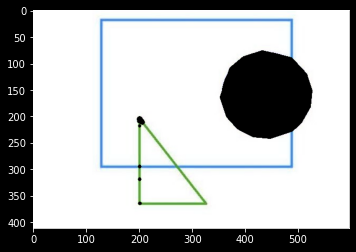

In [5]:
full_intersection= img.copy()
plt.imshow(img)

In [6]:
img = cv2.imread('Input.jpg')
imgGry = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

_, thrash = cv2.threshold(imgGry, 240 , 255, cv2.CHAIN_APPROX_NONE)
# _, thrash = cv2.threshold(imgGry, 127 , 255, cv2.THRESH_BINARY)
contours , _ = cv2.findContours(thrash, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)


print(f'No of countours: {len(contours)}')
# Initialize the maximum intersection area to 0.
max_intersection_area = 0
max_intersection_mask = None

i=0



for contour in contours:

    if i <12:
        i+=1
        continue
    approx = cv2.approxPolyDP(contour, 0.01* cv2.arcLength(contour, True), True)
    cv2.drawContours(img, [approx], 0, (0, 0, 0), 5)
    x = approx.ravel()[0]
    y = approx.ravel()[1] - 5



    mask = np.zeros_like(img, dtype=np.uint8)
    cv2.drawContours(mask, [contour], -1, (255, 255, 255), -1)


    intersection_mask = mask & img

    # Calculate the intersection area.
    intersection_area = np.sum(intersection_mask)

    # If the intersection area is greater than the maximum intersection area, update the maximum intersection area.
    if intersection_area > max_intersection_area:
      max_intersection_area = intersection_area
      max_intersection_mask = intersection_mask


    if len(approx) == 3:
        pass
        # cv2.putText( img, "Triangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0) )
    elif len(approx) == 4 :
        # pass
        x, y , w, h = cv2.boundingRect(approx)
        # aspectRatio = float(w)/h
        # print(aspectRatio)
        # if aspectRatio >= 0.95 and aspectRatio < 1.05:
            # cv2.putText(img, "square", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))

        # else:
            # cv2.putText(img, "rectangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))

    elif len(approx) == 5 :
        pass
        # cv2.putText(img, "pentagon", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
    elif len(approx) == 10 :
        pass
        # cv2.putText(img, "star", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
    # else:
    #     cv2.putText(img, "circle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))


max_intersection_mask2= max_intersection_mask
img[max_intersection_mask > 0] = 0


No of countours: 124


In [7]:
max_intersection_mask2

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

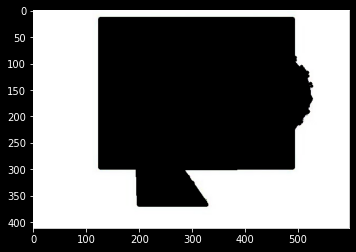

In [8]:
full_intersection= img.copy()
plt.imshow(full_intersection)

In [10]:
# desiredimage= rectangle_intersection & full_intersection
# plt.imshow(desiredimage)

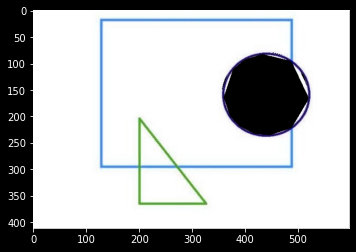

In [11]:
img = cv2.imread('Input.jpg')

final_mask= max_intersection_mask1&max_intersection_mask2

img[final_mask>0]=0
plt.imshow(img)